In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd 'drive/My Drive/Colab Notebooks/ml_p7/'

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks/ml_p7/'
/content/drive/My Drive/Colab Notebooks/ml_p7


In [ ]:
ls

customers.csv  iris.csv  MLCSS344seventh.ipynb


# K - Means Clustering

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

%matplotlib inline

In [12]:
cust = pd.read_csv("customers.csv")
cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [13]:
cust.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [14]:
cust.duplicated().sum()

0

In [15]:
cust.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [16]:
def statistics(variable):
    if variable.dtype == "int64" or variable.dtype == "float64":
        return pd.DataFrame([[variable.name, np.mean(variable), np.std(variable), np.median(variable), np.var(variable)]], 
                            columns = ["Variable", "Mean", "Standard Deviation", "Median", "Variance"]).set_index("Variable")
    else:
        return pd.DataFrame(variable.value_counts())

In [17]:
spending = cust["Spending Score (1-100)"]
statistics(spending)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Spending Score (1-100),50.2,25.758882,50.0,663.52


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

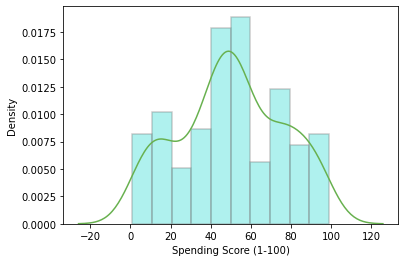

In [18]:
sns.distplot(cust["Spending Score (1-100)"], bins=10, kde_kws={"lw": 1.5, "alpha":0.8, "color":list(map(float, np.random.rand(3,)))},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":list(map(float, np.random.rand(3,)))})

In [19]:
income = cust["Annual Income (k$)"]
statistics(income)

,Mean,Standard Deviation,Median,Variance
Variable,,,,
Annual Income (k$),60.56,26.198977,61.5,686.3864


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

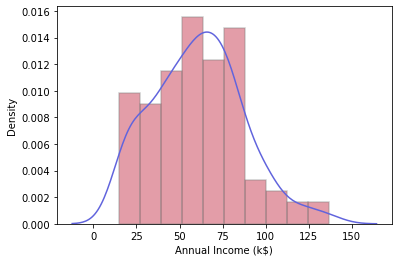

In [20]:
sns.distplot(cust["Annual Income (k$)"], bins=10, kde_kws={"lw": 1.5, "alpha":0.8, "color":list(map(float, np.random.rand(3,)))},
                       hist_kws={"linewidth": 1.5, "edgecolor": "grey",
                                "alpha": 0.4, "color":list(map(float, np.random.rand(3,)))})

In [21]:
gender = cust["Gender"]
statistics(gender)

,Gender
Female,112
Male,88


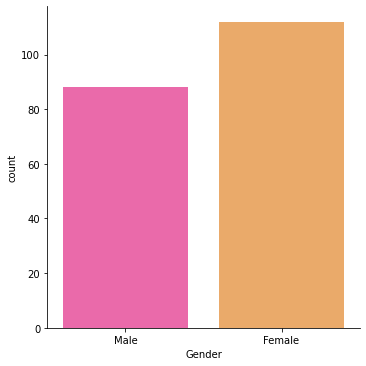

In [22]:
gender = pd.DataFrame(cust["Gender"])
sns.catplot(x=gender.columns[0], kind="count", palette="spring", data=gender)

In [23]:
dummies = pd.get_dummies(cust['Gender'])
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [24]:
cust = cust.merge(dummies, left_index=True, right_index=True)
cust

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,1,0
196,197,Female,45,126,28,1,0
197,198,Male,32,126,74,0,1
198,199,Male,32,137,18,0,1


In [25]:
new_cust = cust.iloc[:,2:]
new_cust

,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


#### WCSS = Within Cluster Sum of Squares. The goal is to minimize WCSS using K-Means Clustering Algorithm

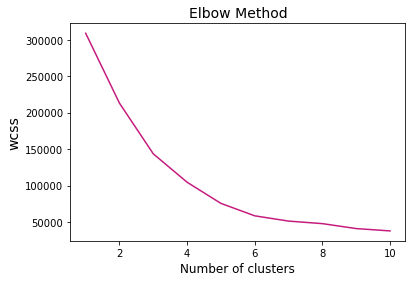

In [26]:
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(new_cust)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss, c="#c51b7d")
plt.title('Elbow Method', size=14)
plt.xlabel('Number of clusters', size=12)
plt.ylabel('wcss', size=14)
plt.show()

In [27]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=10, n_init=10, random_state=0)

In [28]:
kmeans.fit(new_cust)

KMeans(max_iter=10, n_clusters=5, random_state=0)

In [29]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = ["Age", "Annual Income", "Spending", "Male", "Female"])
centroids.index_name = "ClusterID"
centroids["ClusterID"] = centroids.index
centroids = centroids.reset_index(drop=True)
centroids

,Age,Annual Income,Spending,Male,Female,ClusterID
0,45.217391,26.304348,20.913043,0.608696,0.391304,0
1,43.088608,55.291139,49.569620,0.582278,0.417722,1
2,32.692308,86.538462,82.128205,0.538462,0.461538,2
3,40.666667,87.750000,17.583333,0.472222,0.527778,3
4,25.521739,26.304348,78.565217,0.608696,0.391304,4


In [30]:
X_new = np.array([[43, 76, 56, 0, 1]]) 
 
new_customer = kmeans.predict(X_new)
print(f"The new customer belongs to segment(Cluster) {new_customer[0]}")

The new customer belongs to segment(Cluster) 1


# Hierarchical Clustering

In [31]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

In [32]:
scalar = StandardScaler().fit(new_cust)
X = scalar.transform(new_cust)
X

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [33]:
distxy = squareform(pdist(X, metric='euclidean'))
links = linkage(distxy, method='complete', metric='euclidean')

print(distxy)
print(links)

[[0.         1.63681098 3.12485794 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         4.07443301 ... 4.3182849  5.31878915 4.70189264]
 [3.12485794 4.07443301 0.         ... 5.78411589 5.51417485 6.23683863]
 ...
 [4.54611614 4.3182849  5.78411589 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.51417485 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 6.23683863 ... 0.5647686  2.5274803  0.        ]]
[[3.00000000e+00 5.00000000e+00 3.95514768e-01 2.00000000e+00]
 [1.29000000e+02 1.31000000e+02 4.26081870e-01 2.00000000e+00]
 [6.50000000e+01 6.80000000e+01 5.73339431e-01 2.00000000e+00]
 [6.00000000e+01 7.00000000e+01 6.04918571e-01 2.00000000e+00]
 [1.14000000e+02 1.15000000e+02 7.75008163e-01 2.00000000e+00]
 [1.47000000e+02 1.59000000e+02 8.55621048e-01 2.00000000e+00]
 [1.17000000e+02 1.19000000e+02 8.75632942e-01 2.00000000e+00]
 [1.12000000e+02 1.21000000e+02 9.64526499e-01 2.00000000e+00]
 [4.80000000e+01 4.90000000e+01 1.01137307e+00 2.000

<ipython-input-33-ee0d2a72e91f>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  links = linkage(distxy, method='complete', metric='euclidean')


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [95.0, 95.0, 105.0, 105.0],
  [115.0, 115.0, 125.0, 125.0],
  [100.0, 100.0, 120.0, 120.0],
  [85.0, 85.0, 110.0, 110.0],
  [62.5, 62.5, 97.5, 97.5],
  [21.25, 21.25, 80.0, 80.0],
  [135.0, 135.0, 145.0, 145.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [195.0, 195.0, 221.25, 221.25],
  [163.75, 163.75, 208.125, 208.125],
  [140.0, 140.0, 185.9375, 185.9375],
  [50.625, 50.625, 162.96875, 162.96875]],
 'dcoord': [[0.0, 13.352245805311366, 13.352245805311366, 0.0],
  [0.0, 11.735918555502323, 11.735918555502323, 0.0],
  [0.0, 15.12139378004206, 15.12139378004206, 11.735918555502323],
  [13.352245805311366,
   19.89309973735453,
   

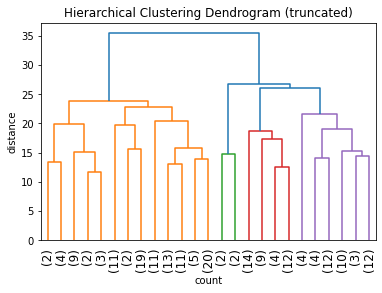

In [34]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('count')
plt.ylabel('distance')
dendrogram(links, truncate_mode='lastp', p=25, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=12)

In [36]:
from sklearn.datasets import load_iris

In [64]:
iris=pd.read_csv('iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [67]:
iris.Species

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [41]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [42]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
sse=[]
rng=range(1,10)
for k in rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(iris_df)
    sse.append(km.inertia_)

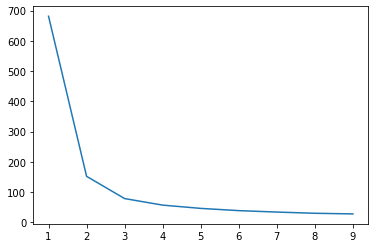

In [48]:
plt.plot(rng,sse)

In [49]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0

SyntaxError: unexpected EOF while parsing (<ipython-input-49-d7e3b40d5227>, line 1)

In [71]:
y_kmeans = kmeans.fit_predict(iris_df)

In [77]:
type(y_kmeans)

numpy.ndarray

In [73]:
print(kmeans.cluster_centers_)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


In [53]:
iris['clusters']=y_kmeans

In [55]:
iris.clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [60]:
type(iris)

sklearn.utils.Bunch

In [76]:
df1=iris[iris.clusters]
df2=iris[iris.clusters==1]
df3=iris[iris.clusters==2]

plt.scatter(df1,color='red')
plt.scatter(df2,color='blue')
plt.scatter(df3,color='green')
plt.scatter(x_centroid,y_centroid,color='Brown',marker='+')

AttributeError: 'DataFrame' object has no attribute 'clusters'

In [59]:
iris[iris.clusters==0]

TypeError: unhashable type: 'numpy.ndarray'

In [75]:
plt.scatter(iris_df[y_kmeans   == 0, 0], iris_df[y_kmeans == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')


TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False]), 0)' is an invalid key

In [122]:
x_centroid=kmeans.cluster_centers_[:1]
y_centroid=kmeans.cluster_centers_[2:]

In [123]:
y_centroid

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097]])

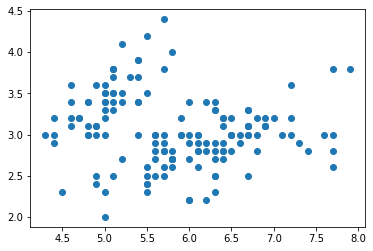

In [125]:
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'])
# plt.scatter(x_centroid,y_centroid)

In [80]:
iris_df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [102]:
iris_df['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64